___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# !pip install skimpy
from skimpy import clean_columns
import scipy.stats as stats
from scipy.stats import skew, kurtosis

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Environment settings: 
# pd.set_option('display.float_format', lambda x: f'{x:.3f}')
# pd.set_option('display.float_format', lambda x: '%.4f'%x)
# pd.options.display.float_format = '{:.4f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

#### Load Dataset

In [66]:
df_origin = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
df = df_origin.copy()
df

Gender  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40
...            ...  ...                 ...                     ...
196         Female   35                 120                      79
197         Female   45                 126                      28
198           Male   32                 126                      74
199           Male   32                 137                      18
200           Male   30                 137                      83

[200 rows x 4 columns]

#### Explore Data

You can rename columns to more usable, if you need.

In [67]:
#df = clean_columns(df)
df.columns = ['gender', 'age', 'annual_income(k$)', 'spending_score(1-100)']

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [68]:
df.shape

(200, 4)

In [69]:
df.duplicated().sum()

0

In [70]:
df.columns

Index(['gender', 'age', 'annual_income(k$)', 'spending_score(1-100)'], dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 200 non-null    object
 1   age                    200 non-null    int64 
 2   annual_income(k$)      200 non-null    int64 
 3   spending_score(1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [72]:
df.describe()

age  annual_income(k$)  spending_score(1-100)
count  200.000000         200.000000             200.000000
mean    38.850000          60.560000              50.200000
std     13.969007          26.264721              25.823522
min     18.000000          15.000000               1.000000
25%     28.750000          41.500000              34.750000
50%     36.000000          61.500000              50.000000
75%     49.000000          78.000000              73.000000
max     70.000000         137.000000              99.000000

In [73]:
df.describe(include='O').T

count unique     top freq
gender   200      2  Female  112

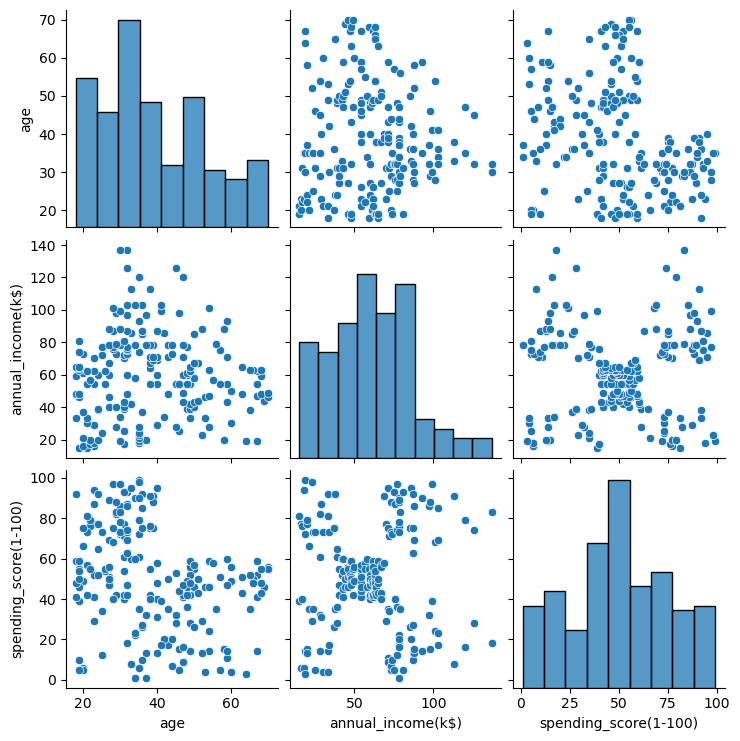

In [74]:
sns.pairplot(df)
plt.show()

In [75]:
df.skew()

age                      0.485569
annual_income(k$)        0.321843
spending_score(1-100)   -0.047220
dtype: float64

In [76]:
df.kurtosis()

age                     -0.671573
annual_income(k$)       -0.098487
spending_score(1-100)   -0.826629
dtype: float64

In [77]:
df.corr()

age  annual_income(k$)  spending_score(1-100)
age                    1.000000          -0.012398              -0.327227
annual_income(k$)     -0.012398           1.000000               0.009903
spending_score(1-100) -0.327227           0.009903               1.000000

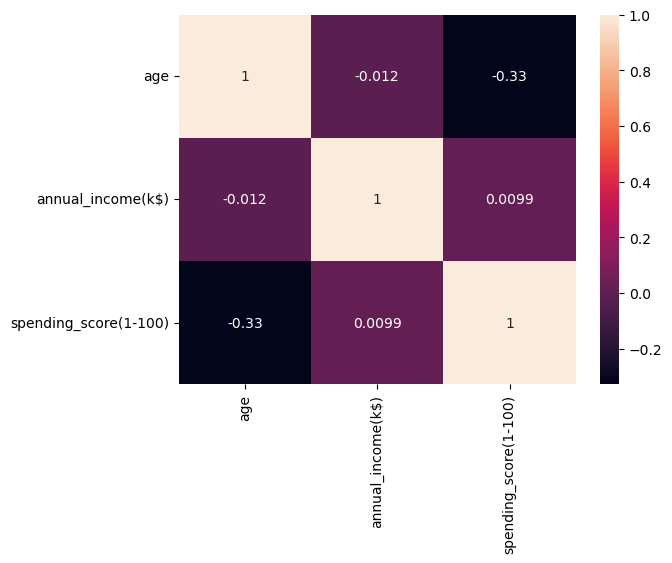

In [78]:
sns.heatmap(df.corr(), annot=True)
plt.show()

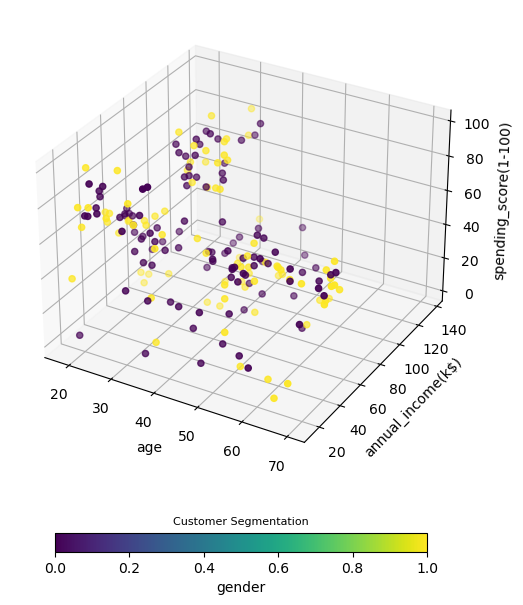

In [79]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(
    df['age'], df['annual_income(k$)'], df['spending_score(1-100)'], 
    c=df['gender'].astype("category").cat.codes, cmap='viridis',
    label='Customer Segmentation'
)
ax.set_xlabel('age')
ax.set_ylabel('annual_income(k$)')
ax.set_zlabel('spending_score(1-100)')

cbar = fig.colorbar(
    ax.get_children()[0], ax=ax, 
    shrink=0.6, aspect=20, pad=0.1,
    label='gender',
    orientation="horizontal"
)
cbar.ax.set_title('Customer Segmentation', size=8)
plt.show()

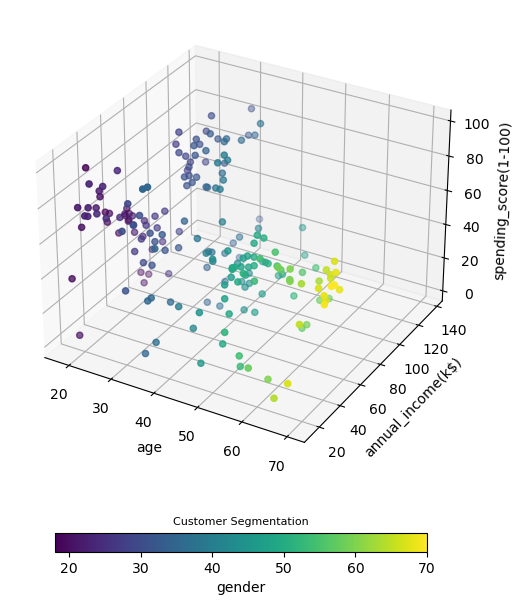

In [80]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(
    df['age'], df['annual_income(k$)'], df['spending_score(1-100)'], 
    c=df['age'], cmap='viridis',
    label='Customer Segmentation'
)
ax.set_xlabel('age')
ax.set_ylabel('annual_income(k$)')
ax.set_zlabel('spending_score(1-100)')

cbar = fig.colorbar(
    ax.get_children()[0], ax=ax, 
    shrink=0.6, aspect=20, pad=0.1,
    label='gender',
    orientation="horizontal"
)
cbar.ax.set_title('Customer Segmentation', size=8)
plt.show()

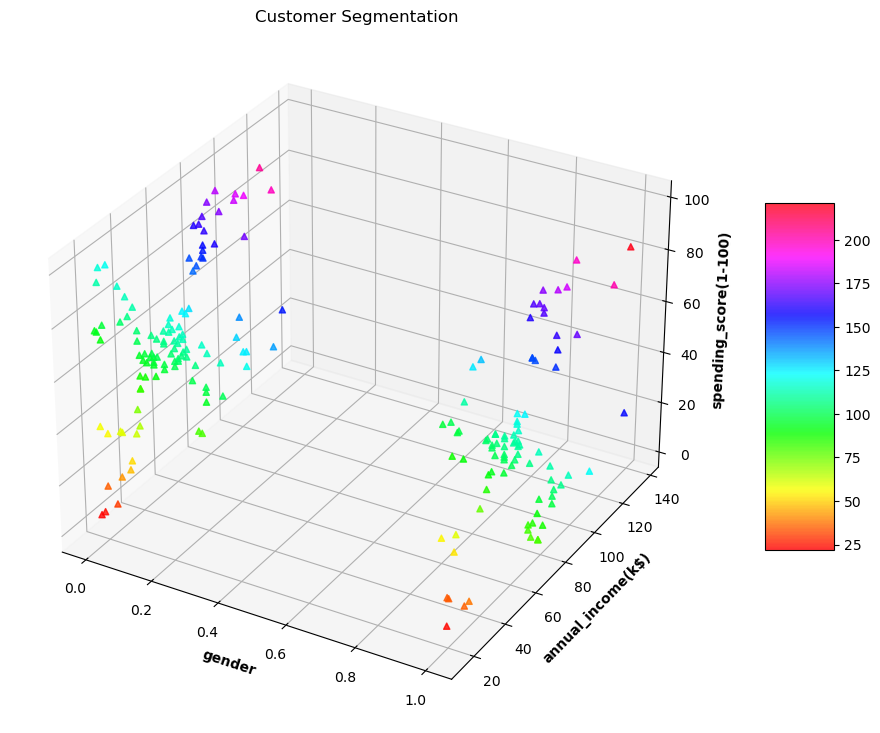

In [81]:
# Import libraries
from mpl_toolkits import mplot3d

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating color map
my_cmap = plt.get_cmap('hsv')
# Creating plot
sctt = ax.scatter3D(df['gender'].astype("category").cat.codes, df['annual_income(k$)'], df['spending_score(1-100)'],
                    alpha = 0.8,
                    c = (df['gender'].astype("category").cat.codes + df['annual_income(k$)'] + df['spending_score(1-100)']),
                    cmap = my_cmap,
                    marker ='^')
plt.title("Customer Segmentation")
ax.set_xlabel('gender', fontweight ='bold')
ax.set_ylabel('annual_income(k$)', fontweight ='bold')
ax.set_zlabel('spending_score(1-100)', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# show plot
plt.show()

In [82]:
df.groupby("gender").describe().T

gender                           Female        Male
age                   count  112.000000   88.000000
                      mean    38.098214   39.806818
                      std     12.644095   15.514812
                      min     18.000000   18.000000
                      25%     29.000000   27.750000
                      50%     35.000000   37.000000
                      75%     47.500000   50.500000
                      max     68.000000   70.000000
annual_income(k$)     count  112.000000   88.000000
                      mean    59.250000   62.227273
                      std     26.011952   26.638373
                      min     16.000000   15.000000
                      25%     39.750000   45.500000
                      50%     60.000000   62.500000
                      75%     77.250000   78.000000
                      max    126.000000  137.000000
spending_score(1-100) count  112.000000   88.000000
                      mean    51.526786   48.511364
                      std     24.114950   27.896770
                      min      5.000000    1.000000
                      25%     35.000000   24.500000
                      50%     50.000000   50.000000
                      75%     73.000000   70.000000
                      max     99.000000   97.000000

In [83]:
df.groupby("gender").corr()

age  annual_income(k$)  \
gender                                                      
Female age                    1.000000           0.059912   
       annual_income(k$)      0.059912           1.000000   
       spending_score(1-100) -0.375439           0.047542   
Male   age                    1.000000          -0.092978   
       annual_income(k$)     -0.092978           1.000000   
       spending_score(1-100) -0.279628          -0.023684   

                              spending_score(1-100)  
gender                                               
Female age                                -0.375439  
       annual_income(k$)                   0.047542  
       spending_score(1-100)               1.000000  
Male   age                                -0.279628  
       annual_income(k$)                  -0.023684  
       spending_score(1-100)               1.000000

In [84]:
df2 = df.copy

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

9Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

## KMeans Clustering

In [87]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [90]:
numbers = df.select_dtypes(include='number').columns
df[numbers] = scaler.fit_transform(df[numbers])

gender       age  annual_income(k$)  spending_score(1-100)
CustomerID                                                            
1             Male -1.424569          -1.738999              -0.434801
2             Male -1.281035          -1.738999               1.195704
3           Female -1.352802          -1.700830              -1.715913
4           Female -1.137502          -1.700830               1.040418
5           Female -0.563369          -1.662660              -0.395980
...            ...       ...                ...                    ...
196         Female -0.276302           2.268791               1.118061
197         Female  0.441365           2.497807              -0.861839
198           Male -0.491602           2.497807               0.923953
199           Male -0.491602           2.917671              -1.250054
200           Male -0.635135           2.917671               1.273347

[200 rows x 4 columns]

In [91]:
df["gender"] = df["gender"] =df.gender.map({"Male":1, "Female":0})

In [92]:
df

gender       age  annual_income(k$)  spending_score(1-100)
CustomerID                                                            
1                1 -1.424569          -1.738999              -0.434801
2                1 -1.281035          -1.738999               1.195704
3                0 -1.352802          -1.700830              -1.715913
4                0 -1.137502          -1.700830               1.040418
5                0 -0.563369          -1.662660              -0.395980
...            ...       ...                ...                    ...
196              0 -0.276302           2.268791               1.118061
197              0  0.441365           2.497807              -0.861839
198              1 -0.491602           2.497807               0.923953
199              1 -0.491602           2.917671              -1.250054
200              1 -0.635135           2.917671               1.273347

[200 rows x 4 columns]

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [93]:
X = df.iloc[:, [1,3]]
X.shape

(200, 2)

In [95]:
X.head(1)

age  spending_score(1-100)
CustomerID                                 
1          -1.424569              -0.434801

In [96]:
#Modelling K-means
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit_predict(X)

array([4, 0, 4, 0, 4, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 4, 0, 2, 0, 4, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 0,
       2, 0, 1, 4, 4, 4, 1, 0, 4, 3, 1, 1, 1, 3, 4, 1, 3, 4, 3, 1, 3, 4,
       1, 3, 4, 4, 3, 1, 3, 3, 3, 4, 1, 1, 4, 1, 3, 1, 3, 1, 4, 1, 1, 4,
       0, 1, 3, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 1, 3, 4, 1, 4, 3, 1, 3, 3,
       3, 4, 1, 4, 4, 4, 3, 1, 1, 1, 4, 1, 1, 0, 4, 0, 1, 0, 2, 0, 2, 0,
       4, 0, 4, 0, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

#### *ii. Determine optimal number of clusters*

### Why silhouette_score is negative?

![image.png](attachment:image.png)

#### *iii. Apply K Means*

#### *iv. Visualizing and Labeling All the Clusters*

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

#### *ii. Determine optimal number of clusters*

#### *iii. Apply K Means*

#### *iv. Visualizing and Labeling All the Clusters*

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

## Clustering based on Annual Income and Spending Score- x2

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

#### Annual Income and Spending Score- x2

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

#### Annual Income and Spending Score- x2

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___